Importing the necessary libraries

In [1]:
#basic librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#algorith used to build the model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

C:\Users\FELICITA\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# model evaluation

from sklearn.metrics import mean_squared_error, r2_score

#for scaling my data
from sklearn.preprocessing import StandardScaler 

Loading the dataset

In [4]:
train_data=pd.read_excel(r"C:\Users\FELICITA\Documents\imarticus\python\downloads\Data_Train.xlsx")

In [5]:
#check top 5 records
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


1.training dataset              -----in this dataset both independent and dependent features will be available
2.testing dataset               -----
3.sample submission dataset     -----which format the file should be submited 

In [6]:
train_data.shape

(10683, 11)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


we can see there is a missing values in route and total stops(we can treet the missing values later on)

now we will load the testing dataset

In [8]:
test_data=pd.read_excel(r"C:\Users\FELICITA\Documents\imarticus\python\downloads\Test_set.xlsx")

In [9]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [10]:
test_data.shape

(2671, 10)

In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


Exploratory data analysis

Trainind dataset

In [12]:
#checking for null values
null_features=train_data.isnull().sum()
null_features[null_features>0]

Route          1
Total_Stops    1
dtype: int64

In [13]:
train_data[(train_data["Route"].isnull())|(train_data["Total_Stops"].isnull())]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


now in the 9030 row there is a null value for both route and total_stops1
(1.drop those records
or
you can treat the missing values)

In [14]:
#checking for duplicates
train_data[train_data.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
1685,Jet Airways,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 10 May,13h 30m,2 stops,No info,15129
1704,IndiGo,09/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,6860
1807,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 02 Jun,21h 40m,2 stops,In-flight meal not included,10919
1891,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,In-flight meal not included,10368
1971,Jet Airways,9/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,04:25 11 May,29h 20m,2 stops,No info,15129


In [15]:
#remove the duplicates values by keeping first record
train_data.drop_duplicates(keep="first",inplace=True)


In [16]:
train_data.shape

(10463, 11)

In [17]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Featuring engineering

1.date of journey

In [18]:
#wewill check for date_of_journey
train_data.Date_of_Journey.dtype

dtype('O')

In [19]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [20]:
#will check 1 record to know how the data looks like
train_data.Date_of_Journey[0]

'24/03/2019'

In [21]:
#we will extract only date from Date_of_Journey
train_data["Date"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.day

In [22]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [23]:
#extract only month from Date_of_journey
train_data["Month"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.month

In [24]:
#extract only Year from Date_of_journey
train_data["Year"]=pd.to_datetime(train_data.Date_of_Journey,format="%d/%m/%Y").dt.year

In [25]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [26]:
train_data.drop("Date_of_Journey",axis=1,inplace=True)

In [27]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


## departure Time

similar to date of journey we can extract values of hours as well as minutes for departure time column

In [28]:
train_data.Dep_Time.dtype

dtype('O')

In [29]:
train_data.Dep_Time[0]

'22:20'

In [30]:
#now we will extrate hours from the departure time
train_data["Dep_hour"]=pd.to_datetime(train_data.Dep_Time).dt.hour

In [31]:
#now we will extrate minutes from the departure time
train_data["Dep_minutes"]=pd.to_datetime(train_data.Dep_Time).dt.minute

In [32]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [33]:
train_data.drop("Dep_Time",axis=1,inplace=True)

In [34]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


arival time

In [35]:
#similar to dept time we can ectract the hours and minutes in arival time
train_data["Arrival_hour"]=pd.to_datetime(train_data.Arrival_Time).dt.hour

In [36]:
#similar to dept time we can ectract the hours and minutes in arival time
train_data["Arrival_minutes"]=pd.to_datetime(train_data.Arrival_Time).dt.minute

In [37]:
train_data.drop("Arrival_Time",axis=1,inplace=True)

In [38]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


## Duration

In [39]:
train_data.Duration[0].split()[0]

'2h'

In [40]:
duration=list(train_data.Duration)

In [41]:
duration[0]

'2h 50m'

In [42]:
len(duration)

10463

In [43]:
duration[0].split("m")[0].split()[-1]

'50'

In [44]:
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if "h" in duration[i]:
            duration[i]=duration[i].strip()+" 0m"
        elif "m" in duration[i]:
            duration[i]="0h "+duration[i]
            
duration_hour=[]
duration_min=[]

for i in range(len(duration)):
    duration_hour.append(int(duration[i].split("h")[0]))
    duration_min.append(int(duration[i].split("m")[0].split()[-1]))
 

In [45]:
train_data["duration_hour"]=duration_hour
train_data["duration_min"]=duration_min

In [46]:
train_data.drop("Duration",axis=1,inplace=True)

In [47]:
train_data.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
Date                int64
Month               int64
Year                int64
Dep_hour            int64
Dep_minutes         int64
Arrival_hour        int64
Arrival_minutes     int64
duration_hour       int64
duration_min        int64
dtype: object

In [48]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


## Route

In [49]:
#most busiest route
train_data.Route.value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1536
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → BLR → COK                       232
DEL → COK                             213
DEL → JAI → BOM → COK                 183
DEL → MAA → COK                       146
DEL → AMD → BOM → COK                 144
DEL → IDR → BOM → COK                  90
DEL → HYD → MAA → COK                  83
CCU → MAA → BLR                        65
CCU → HYD → BLR                        53
CCU → BBI → BLR                        50
DEL → BHO → BOM → COK                  48
CCU → IXR → DEL → BLR                  46
DEL → HYD → BOM → COK                  45
DEL → GOI → BOM → COK                  44
DEL → CCU → BOM → COK             

In [50]:
train_data.drop("Route",axis=1,inplace=True)

Delhi to cochin via mumbai as busiest route with 2376 which is fallowed by Bangalore to Delhi

so let me drop routes information because it will lead to multicolinearity (where 2 independent features are related to eachother ) 

now we will do some analysis for those catagorical features

In [51]:
df_catagorical_features=train_data.dtypes[train_data.dtypes=="object"].index
df_catagorical_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'], dtype='object')

Airline


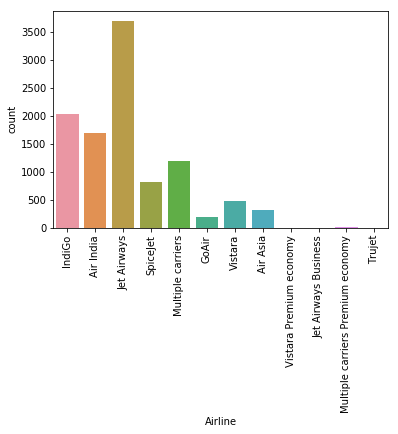

Source


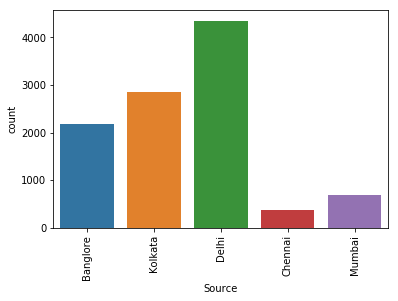

Destination


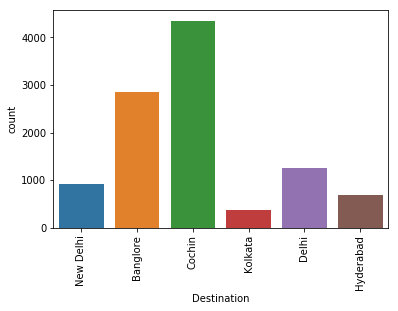

Total_Stops


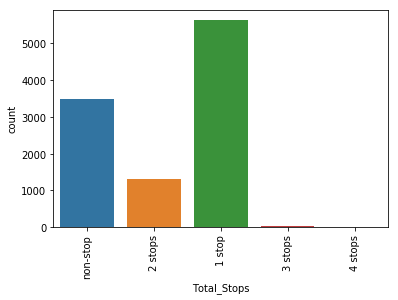

Additional_Info


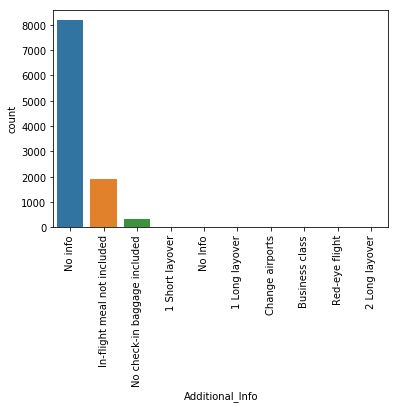

In [52]:
for i in df_catagorical_features:
    print(i)
    sns.countplot(train_data[i])
    plt.xticks(rotation=90)
    plt.show()

1. Jet Airways is the highest used Airline to travel
2. Most of the peoplr start traveling from Delhi
3. Most of the people travel to Cochin
4. there are more number of one stop travels compared to others
5. there is no much information provided by additional information since no info has high percentage(so we can drop this column)

In [53]:
train_data.drop("Additional_Info",axis=1,inplace=True)

In [54]:
df_catagorical_features=train_data.dtypes[train_data.dtypes=="object"].index
df_catagorical_features

Index(['Airline', 'Source', 'Destination', 'Total_Stops'], dtype='object')

Airline


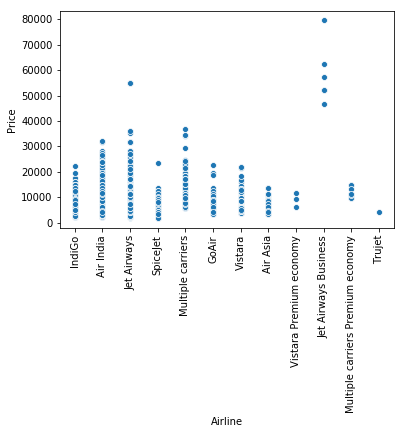

Source


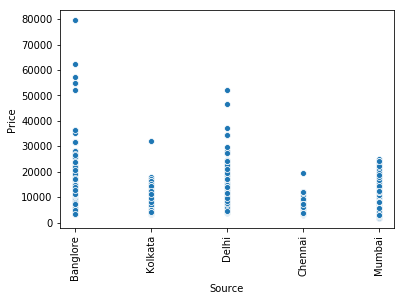

Destination


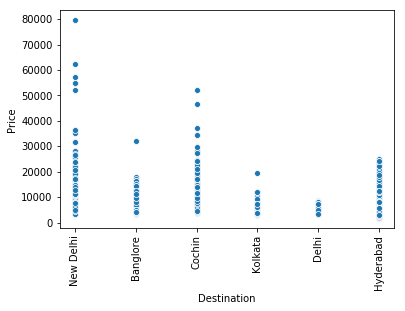

Total_Stops


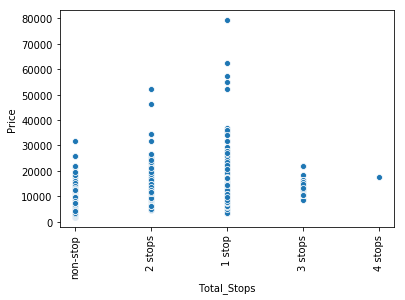

In [55]:
for i in df_catagorical_features:
    print(i)
    sns.scatterplot(x=i,y="Price",data=train_data)
    plt.xticks(rotation=90)
    plt.show() 

1. Jet Airways Business has the highest pricing
2. Bangalore has the highest price as in sorce station
3. New Delhi has the highest price as in destination station
4. One stop has the highest pricing

In [56]:
train_data

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,non-stop,3873,24,6,2019,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,1 stop,11087,12,3,2019,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,1 stop,22270,1,3,2019,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,1 stop,11087,12,3,2019,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,1 stop,8625,27,5,2019,11,25,19,15,7,50


In [57]:
train_data.dropna(inplace=True)

In [58]:
train_data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [59]:
train_data.replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4},inplace=True)

In [60]:
X=train_data.drop("Price",axis=1)
X.head()

,Airline,Source,Destination,Total_Stops,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,0,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,1,3,2019,16,50,21,35,4,45


In [61]:
y=train_data.Price
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [62]:
X=pd.get_dummies(X,drop_first=True)

In [63]:
X.head()

,Total_Stops,Date,Month,Year,Dep_hour,Dep_minutes,Arrival_hour,Arrival_minutes,duration_hour,duration_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2019,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,2019,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,2019,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,2019,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,2019,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=14)

In [65]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((8369, 30), (2093, 30), (8369,), (2093,))

In [66]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_train_pre=lr.predict(X_train)
y_test_pre=lr.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 2893.706979163004
Test RMSE = 2620.9880263761615
Train R2_square = 0.6185110349883294
Test R2_square = 0.6410430557741899


In [67]:
DR=DecisionTreeRegressor()
DR.fit(X_train,y_train)
y_train_pre=DR.predict(X_train)
y_test_pre=DR.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 796.8163752037271
Test RMSE = 2477.200302679943
Train R2_square = 0.9710739336696111
Test R2_square = 0.6793475708296507


### First we want to build the base model and which ever model was giving me best accuracy based on that we want to perfrom Hypertuning technique

In [68]:
#depth of the tree
max_depth=[i for i in range(1,30,5)]
#minimum number of leaves
min_samples_leaf=[i for i in range(1,10,2)]

max_features=["auto","sqrt","log2"]

In [69]:
random_grid_DR={"max_depth":max_depth,"min_samples_leaf":min_samples_leaf,"max_features":max_features}

In [70]:
from sklearn.model_selection import RandomizedSearchCV

DR_model = RandomizedSearchCV(estimator = DR,param_distributions = random_grid_DR,cv=4,random_state = 0)

In [71]:
DR_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_depth': [1, 6, 11, 16, 21, 26], 'min_samples_leaf': [1, 3, 5, 7, 9], 'max_features': ['auto', 'sqrt', 'log2']},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [72]:
DR_model.best_params_

{'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 11}

In [73]:
DR=DecisionTreeRegressor(min_samples_leaf= 1,max_depth=11,max_features="auto")
DR.fit(X_train,y_train)
y_train_pre=DR.predict(X_train)
y_test_pre=DR.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 1592.565048548541
Test RMSE = 2164.7820274399965
Train R2_square = 0.884450721798613
Test R2_square = 0.7551271517136509


In [74]:
RF=RandomForestRegressor()
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 1089.24311029902
Test RMSE = 1871.1124326338524
Train R2_square = 0.9459466618375655
Test R2_square = 0.8170585763406931


In [75]:
n_estimators=[i for i in range(50,500,50)]
max_depth=[i for i in range(5,30,5)]
min_samples_leaf=[i for i in range(2,20,2)]

In [76]:
random_grid_RF={"n_estimators":n_estimators,"max_depth":max_depth,"min_samples_leaf":min_samples_leaf}

In [77]:
RF_model = RandomizedSearchCV(estimator = RF,param_distributions = random_grid_RF,cv=4,random_state = 0)

In [78]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=4, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450], 'max_depth': [5, 10, 15, 20, 25], 'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [79]:
RF_model.best_params_

{'n_estimators': 50, 'min_samples_leaf': 6, 'max_depth': 20}

In [80]:
RF=RandomForestRegressor(n_estimators=50, min_samples_leaf=6, max_depth=20)
RF.fit(X_train,y_train)
y_train_pre=RF.predict(X_train)
y_test_pre=RF.predict(X_test)
train_rmse=np.sqrt(mean_squared_error(y_train,y_train_pre))
test_rmse=np.sqrt(mean_squared_error(y_test,y_test_pre))
print("Train RMSE =",train_rmse)
print("Test RMSE =",test_rmse)
train_r2_score=r2_score(y_train,y_train_pre)
test_r2_score=r2_score(y_test,y_test_pre)
print("Train R2_square =",train_r2_score)
print("Test R2_square =",test_r2_score)

Train RMSE = 1838.9064448252575
Test RMSE = 1862.80376484041
Train R2_square = 0.8459392008564427
Test R2_square = 0.8186796705222067
